In [2]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

/home/muntag/anaconda/envs/an3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


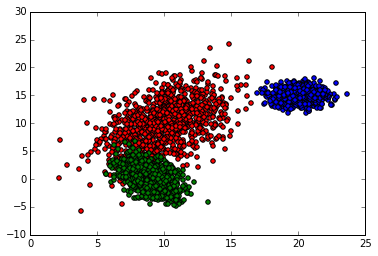

In [74]:
A = np.random.multivariate_normal([20,15],[[1,0],[0,1]],1000)
B = np.random.multivariate_normal([10,10],[[7,9],[3,15]],1000)
C = np.random.multivariate_normal([9,0],[[1.6,-3.0],[-0.05,2.5]],1000)
pp.scatter(A.T[0],A.T[1], c='blue')
pp.scatter(B.T[0],B.T[1], c='red')
pp.scatter(C.T[0],C.T[1], c='green')

In [75]:
data = np.concatenate([A,B,C])
means = [data[x] for x in np.random.choice(len(data),3)]
pp.scatter(data.T[0],data.T[1])
pp.scatter(np.array(means).T[0], np.array(means).T[1], c="orange", marker='+', s=200, linewidths=4)
means

[array([ 20.08329919,  14.23155881]),
 array([ 19.19061981,  13.8818291 ]),
 array([ 19.63861225,  15.86506643])]

/home/muntag/anaconda/envs/an3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


/home/muntag/anaconda/envs/an3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


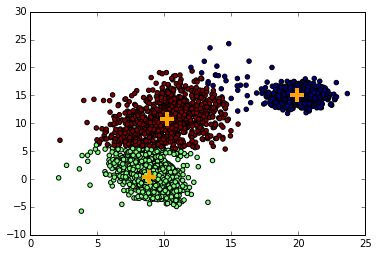

In [76]:
def UpdateLabel(datapoint,means):
    return np.argmin([(datapoint-mean).dot(datapoint-mean) for mean in means])

def UpdateLabels(data,means):
    return np.array([UpdateLabel(datapoint,means) for datapoint in data])

def UpdateMeans(data,means,labels):
    return [np.array([data[labels==i].T[0].mean(),data[labels==i].T[1].mean()]) for i in range(len(means))]

def KMeans(data,initial_means,iteration):
    means = initial_means
    for it in range(iteration):
        labels = UpdateLabels(data,means)
        means = UpdateMeans(data,means,labels)
    pp.scatter(data.T[0],data.T[1],c=labels)
    pp.scatter(np.array(means).T[0], np.array(means).T[1], c="orange", marker='+', s=200, linewidths=4)
    
KMeans(data,means,100)    